# Linear Regression On Realistic Dataset

## Importing libraries

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from sklearn.linear_model import LinearRegression 
import warnings
warnings.filterwarnings('ignore')
!pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for plumbum from https://files.pythonhosted.org/packages/6f/e8/a9a580d1d67825d8bdc16f3993ea58c4066769d5f8ba34caaa69a5344b39/plumbum-1.8.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   ---------------------------------------- 127.0/127.0 kB 2.5 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33290 sha256=bd48e922586f2643da73e1c235dfbfbc4b5def98da1fbddeade0bf23bfef131f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\1c\a9\c4\6254542c4e8202d52fcd69798d2507aaad1f2a4bb60f2f0fea
Successfully built pandoc


## loading the Datset

In [2]:
raw_data =pd.read_csv("1.04.+Real-life+example.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Here,We are trying to predict the 'Price' 

## PreProcessing 

In [3]:
raw_data.describe(include='all') # include='all' is for including the Categorical properties as well for Description

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


As,we can see that,

1.Model has 312 unique values, which is hard to implement in Regression.Because,it requires 312 Dummmies.And Model is interlinked with Brand,Year,EngineVolume

2.we can see there are Missing Values in Price,EngineV

3.Removing Outliers

4.Registration has Almost 98% Yes.So, This can be ignored for Analysis


In [4]:
# Solving problem 1

#Droping Model

data=raw_data.drop(['Model'],axis=1) # axis ->1, for coliumn droping and 0,for row droping
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
# Problem 2

# counting the no.of null entries 
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
# As the Missing values are Too Small compared to dataset.So, lets just Drop those Entries for Beter Accuracy

# dropna -> Remove missing values.
data_no_mv= data.dropna(axis=0) # rows(Entries) with Missing Values are being Deleted
data_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Drawing probability Distributions for Identifying Outliers

<Axes: xlabel='Price', ylabel='Density'>

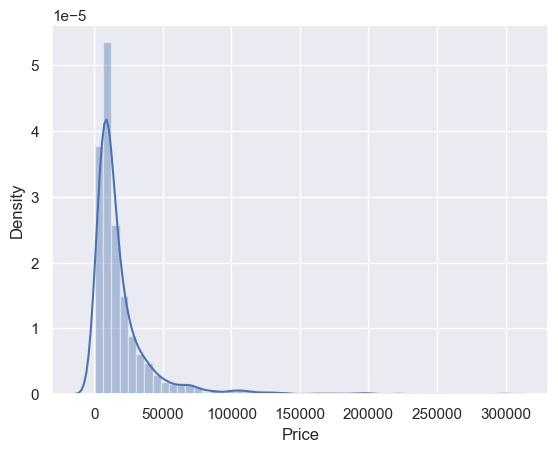

In [7]:
sns.distplot(data_no_mv['Price'])

### We can see that is Exponential Distributed,which surely not want we want.
### And ,we can see Mean and Max are Differ By a large Margin.which indicates Outliers

In [8]:
# Dealing outliers

# Removing Top 5% prices
x =data_no_mv['Price'].quantile(0.95) #x now holds the 95% value of max value
data_1 =data_no_mv[data_no_mv['Price']< x]


<Axes: xlabel='Price', ylabel='Density'>

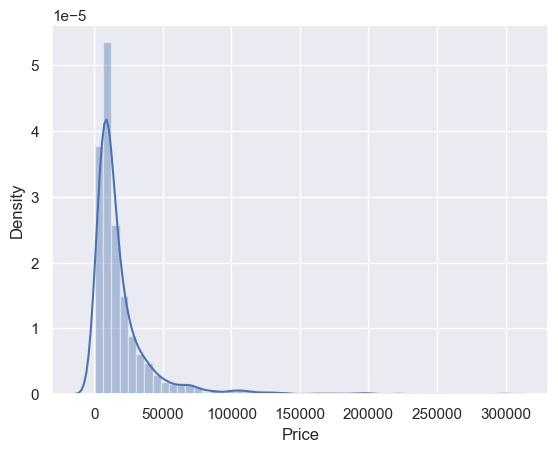

In [9]:
sns.distplot(data_no_mv['Price'])


In [10]:
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3823,3823.000000,3823,3823.000000,3823.000000,3823,3823,3823.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,872,NaN,1491,NaN,NaN,1740,3452,NaN
mean,NaN,14911.796798,NaN,171.095998,2.715250,NaN,NaN,2005.934868
std,NaN,12198.369515,NaN,99.269432,5.052605,NaN,NaN,6.565549
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6800.000000,NaN,100.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10900.000000,NaN,163.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,19150.000000,NaN,234.000000,3.000000,NaN,NaN,2011.000000


continuation from previous post on 25,Jan,2024 on linkedin

We have a similar issue with "Mileage",'EngineV' and 'Year'

<Axes: xlabel='Mileage', ylabel='Density'>

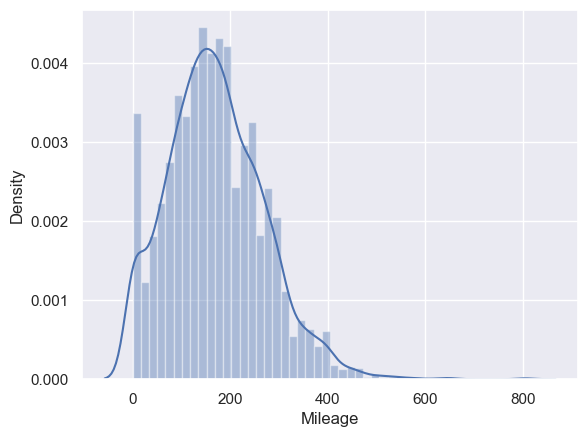

In [11]:
sns.distplot(data_1['Mileage'])

<Axes: xlabel='Mileage', ylabel='Density'>

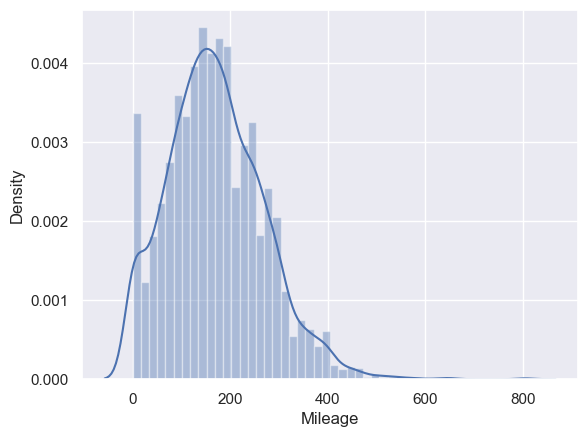

In [12]:
#Dealing in same way as previous
# Removing Top 5% prices
x =data_1['Mileage'].quantile(0.95) #x now holds the 95% value of max value
data_2 =data_1[data_1['Mileage']< x]
sns.distplot(data_1['Mileage'])

<Axes: xlabel='EngineV', ylabel='Density'>

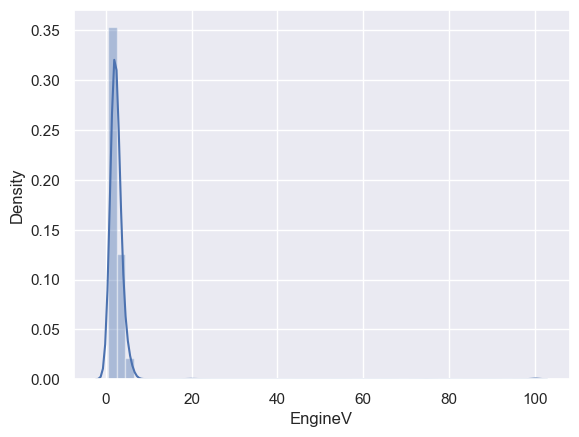

In [13]:
# EngineV
sns.distplot(data_2['EngineV'])

<Axes: xlabel='EngineV', ylabel='Density'>

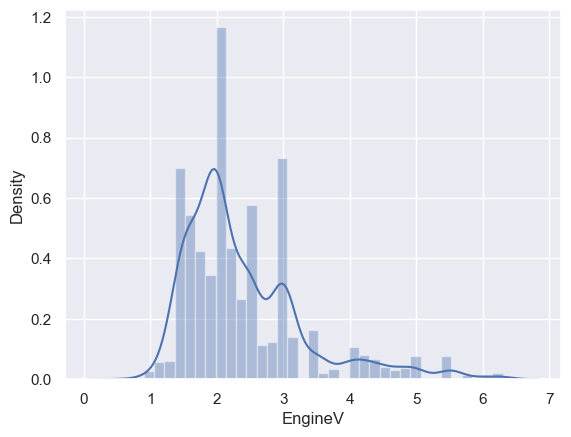

In [14]:
# we can see that there some ouliers ariund 100 in dataset.
# Generally,EngineVolume would be in the range would be lessthan 6.5.so,Removing values with more than 6.5


data_3=data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

<Axes: xlabel='Year', ylabel='Density'>

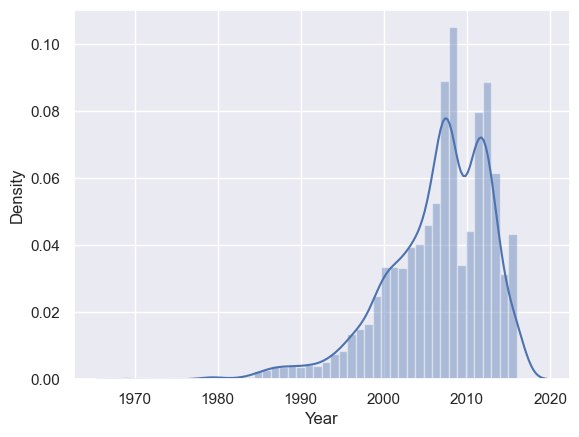

In [15]:
# YEAR
sns.distplot(data_3['Year'])

Here,the problem is with the lower end.So,here we will remove first 5% AND keep the Remaining

<Axes: xlabel='Year', ylabel='Density'>

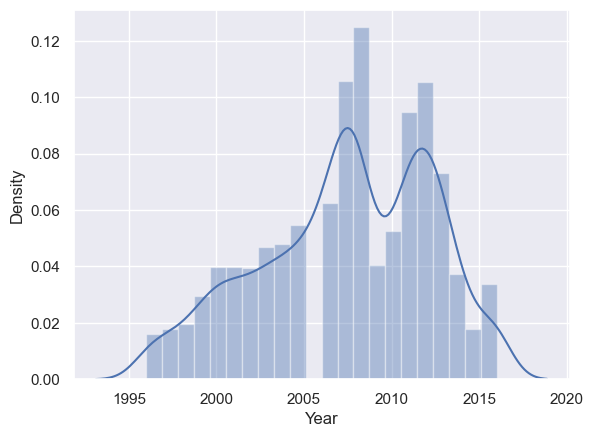

In [16]:
x =data_3['Year'].quantile(0.05) #x now holds the 05% value of max value
data_4 =data_3[data_3['Year']>x]
sns.distplot(data_4['Year'])

## Outliers are reticifed

In [17]:
data_cleaned=data_4.reset_index(drop=True)

In [18]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3411,3411.000000,3411,3411.000000,3411.000000,3411,3411,3411.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,771,NaN,1252,NaN,NaN,1593,3084,NaN
mean,NaN,16102.241003,NaN,155.330695,2.416860,NaN,NaN,2007.396072
std,NaN,12294.559996,NaN,81.698414,0.938609,NaN,NaN,4.871905
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1996.000000
25%,NaN,7800.000000,NaN,97.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,11960.000000,NaN,155.000000,2.000000,NaN,NaN,2008.000000
75%,NaN,20900.000000,NaN,215.000000,3.000000,NaN,NaN,2011.000000


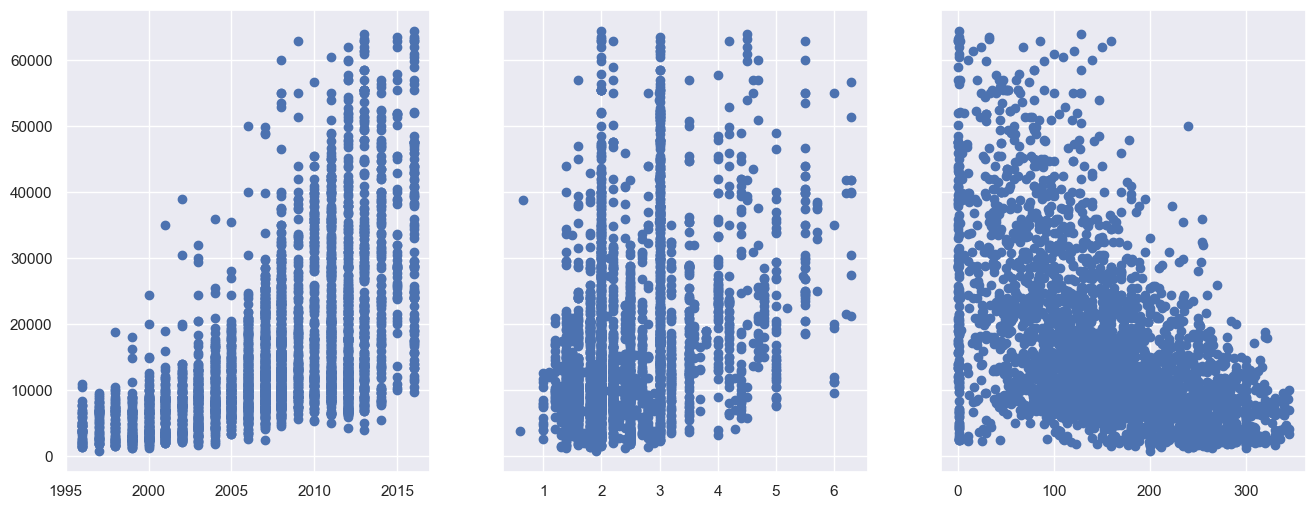

In [19]:
fig,ax=plt.subplots(1,3,sharey=True,figsize=(16,6))
ax[0].scatter(data_cleaned['Year'],data_cleaned['Price'])
ax[1].scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax[2].scatter(data_cleaned['Mileage'],data_cleaned['Price'])

#### we can see those werent fit for LInear model directly so, we will modify the dataset.
#### As,we can exponential pattern in every scatterplot.it may be due to price.so,we will 'Apply log transformation for price'


In [20]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
1,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
2,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
3,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209
4,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,7.244228
...,...,...,...,...,...,...,...,...,...
3406,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3407,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3408,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3409,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


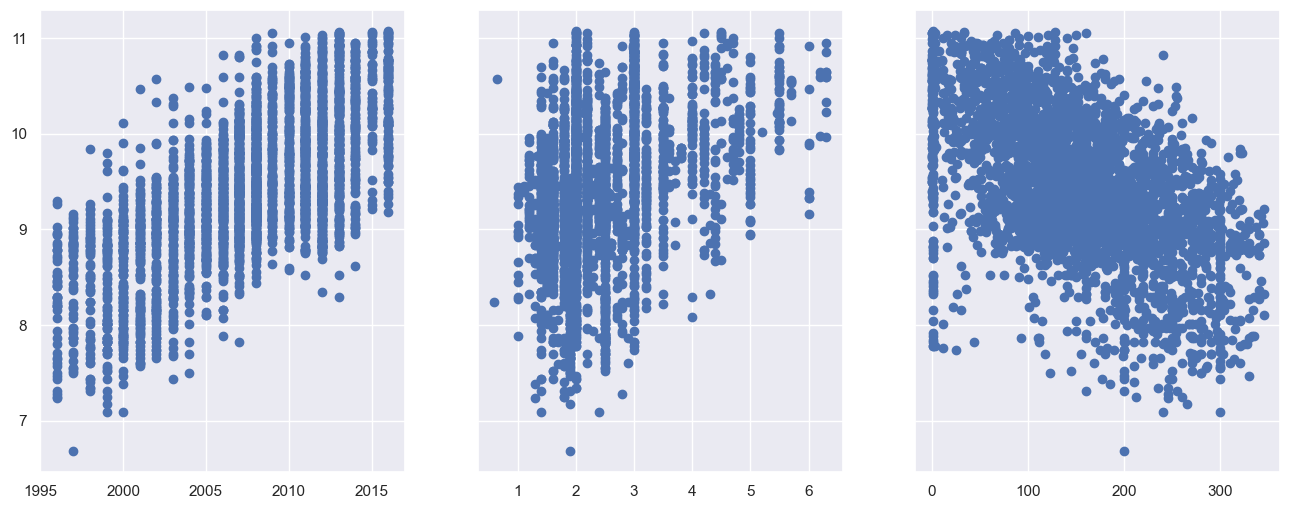

In [21]:
fig,ax=plt.subplots(1,3,sharey=True,figsize=(16,6))
ax[0].scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax[1].scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax[2].scatter(data_cleaned['Mileage'],data_cleaned['log_price'])

### we can see Linear pattern through them.now,we can proceed further

In [22]:
data_cleaned.drop(['Price'],axis=1,inplace=True)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
1,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
2,Audi,vagon,200,2.7,Diesel,yes,2006,9.560997
3,Renault,vagon,193,1.5,Diesel,yes,2012,9.287209
4,Volkswagen,other,212,1.8,Gas,no,1999,7.244228


## creating dummys

In [23]:
df=pd.get_dummies(data_cleaned,drop_first=True)
df.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,240,4.2,2007,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,120,2.0,2011,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
2,200,2.7,2006,9.560997,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
3,193,1.5,2012,9.287209,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True
4,212,1.8,1999,7.244228,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False


will continue tommorow

## Linear Regreession Model

#### Declare targets and input

In [24]:
targets=df['log_price']
inputs=df.drop('log_price',axis=1)

## Scaling the data

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [26]:
scaled_inputs=scaler.transform(inputs)

## train Test Split

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.2,random_state=0)

#### Create Linear Regression 

In [28]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg.fit(x_train,y_train)
yhat=reg.predict(x_train)

<Axes: xlabel='log_price', ylabel='Density'>

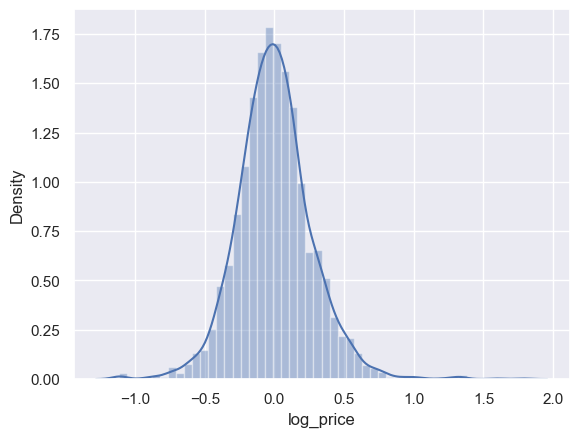

In [29]:
sns.distplot(yhat-y_train)

We can see that our almost predicted correctly i.e mean =0 

In [30]:
# r-square value 
reg.score(x_train,y_train)

0.8697456575033751

In [31]:
reg.intercept_

9.415630500715395

In [32]:
reg.coef_

array([-0.06025876,  0.20726302,  0.43373047,  0.02882666, -0.0109128 ,
       -0.12821393, -0.2064367 , -0.06669928, -0.09922939, -0.08799252,
       -0.07030272, -0.12732503, -0.08619376, -0.15120049, -0.03397218,
       -0.0112988 , -0.05188856,  0.24649267])

## Testing 

In [33]:
yhat_test=reg.predict(x_test)

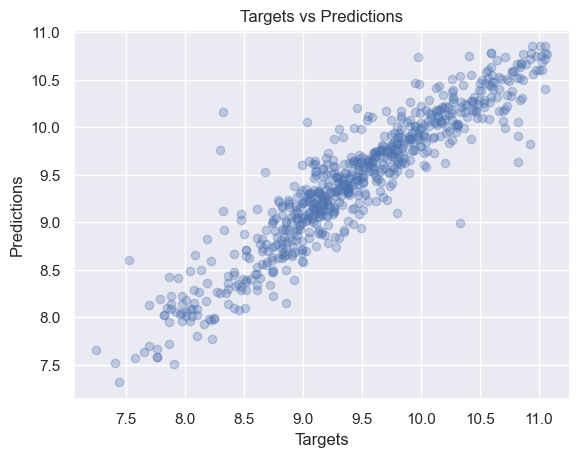

In [34]:
# ploting a scatter plot yhat_test and y_test to check how our model predicted 
plt.scatter(y=yhat_test,x=y_test,alpha=0.3)
plt.title('Targets vs Predictions')
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.show()

we can see that our model is predicting 'Excellent' for Higher Values and Performing 'poor' at lower Values    

In [35]:
df_perf=pd.DataFrame(np.exp(yhat_test),columns=['Predictions'])
df_perf.head()

,Predictions
0,9559.287017
1,15278.679254
2,15553.539051
3,6206.466929
4,4277.895761


In [36]:
df_perf["Targets"]=np.exp(y_test.reset_index(drop=True))
df_perf.head()

,Predictions,Targets
0,9559.287017,6799.0
1,15278.679254,18200.0
2,15553.539051,14100.0
3,6206.466929,6200.0
4,4277.895761,3600.0


In [37]:
# Lets Take residual 
df_perf["residual"]=df_perf["Targets"]-df_perf["Predictions"]
df_perf.head()

,Predictions,Targets,residual
0,9559.287017,6799.0,-2760.287017
1,15278.679254,18200.0,2921.320746
2,15553.539051,14100.0,-1453.539051
3,6206.466929,6200.0,-6.466929
4,4277.895761,3600.0,-677.895761


In [38]:
df_perf["Difference"]=np.absolute(df_perf["residual"]/df_perf["Targets"]*100)
df_perf.head()

,Predictions,Targets,residual,Difference
0,9559.287017,6799.0,-2760.287017,40.598426
1,15278.679254,18200.0,2921.320746,16.051213
2,15553.539051,14100.0,-1453.539051,10.308788
3,6206.466929,6200.0,-6.466929,0.104305
4,4277.895761,3600.0,-677.895761,18.830438


In [39]:
df_perf.describe()

,Predictions,Targets,residual,Difference
count,683.000000,683.000000,683.000000,683.000000
mean,15675.096568,16798.927204,1123.830635,21.623893
std,10609.327496,13414.369544,5870.680091,30.853768
min,1498.262359,1400.000000,-24586.150585,0.004797
25%,8000.478537,7700.000000,-1359.925511,7.039833
50%,13018.673884,12000.000000,125.667377,15.694500
75%,21490.079797,21550.000000,2322.002958,26.942225
max,51485.776932,64000.000000,37193.579326,531.309289


#### So,we can conclude that Our model has min diference% as 0.004 which is outstanding.But,max and 50% being close to 20.


### Overall for me its been a Good Experience with dataset